In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import keras
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.callbacks import ReduceLROnPlateau

In [162]:
data_train = pd.read_csv('train.csv')

In [163]:
X_train = data_train.iloc[:, 1:]
Y_train = data_train.iloc[:, 0]

In [164]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [166]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [167]:
X_train = X_train / 255.0

In [168]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

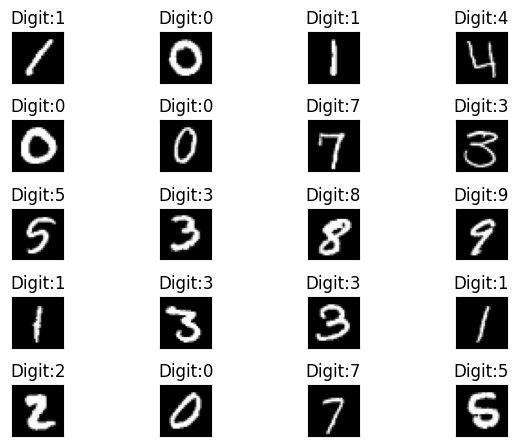

In [169]:
plot_digits(X_train, Y_train)

In [170]:
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [171]:
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [172]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [173]:
for layer in model.layers:
    if isinstance(layer, Conv2D):
        print("Layer Name:", layer.name)
        weights = layer.get_weights()[0]
        print("Kernel Shape:", weights.shape)
        print("Kernels:")
        for i in range(weights.shape[3]):
            kernel = weights[:, :, :, i]
            print(kernel)
            print()

Layer Name: conv2d_12
Kernel Shape: (5, 5, 1, 6)
Kernels:
[[[ 0.06549771]
  [-0.01137899]
  [-0.07349247]
  [ 0.00433762]
  [-0.10371824]]

 [[-0.00671557]
  [ 0.03868473]
  [ 0.01110956]
  [-0.0992782 ]
  [-0.15226814]]

 [[-0.184916  ]
  [ 0.14637019]
  [ 0.16259418]
  [ 0.11602463]
  [-0.05016495]]

 [[-0.09994438]
  [-0.13563085]
  [ 0.055838  ]
  [ 0.06690489]
  [-0.11688252]]

 [[ 0.17383583]
  [ 0.12920992]
  [ 0.05594179]
  [ 0.11109076]
  [-0.10736355]]]

[[[-0.07323872]
  [ 0.10502131]
  [-0.10973771]
  [-0.00089732]
  [-0.05097835]]

 [[-0.10729954]
  [-0.04501958]
  [-0.03810826]
  [ 0.0364258 ]
  [ 0.12617697]]

 [[ 0.01776637]
  [ 0.12007277]
  [-0.0559168 ]
  [-0.1370887 ]
  [-0.14788488]]

 [[ 0.08402319]
  [-0.08610041]
  [ 0.1676449 ]
  [ 0.12642778]
  [-0.04930131]]

 [[ 0.1377834 ]
  [ 0.09157129]
  [-0.00939734]
  [-0.06449779]
  [-0.03446247]]]

[[[ 0.17072599]
  [ 0.12407209]
  [-0.15938067]
  [ 0.15200265]
  [-0.08254966]]

 [[-0.15540308]
  [-0.11018324]
  [-0.

In [174]:
model.build()
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,666 (498.70 KB)

 Trainable params: 127,666 (498.70 KB)

 Non-trainable params: 0 (0.00 B)

- loss='categorical_crossentropy': Xác định hàm mất mát mà mô hình sẽ sử dụng trong quá trình huấn luyện. Trong trường hợp này, mất mát được tính bằng cross-entropy đa lớp, thích hợp cho bài toán phân loại đa lớp.
- metrics=['accuracy']: Xác định các độ đo mà mô hình sẽ đánh giá trong quá trình huấn luyện. Trong trường hợp này, chỉ có độ chính xác được đo lường.
- optimizer=adam: Xác định bộ tối ưu hóa mà mô hình sẽ sử dụng để cập nhật các trọng số trong quá trình huấn luyện. Trong trường hợp này, mô hình sử dụng Adam optimizer được khởi tạo ở phần trước.

đoạn mã này đang chuẩn bị mô hình mạng nơ-ron để đào tạo, với các thiết lập cụ thể cho hàm mất mát, các độ đo và thuật toán tối ưu hóa.

In [175]:
adam = Adam(learning_rate=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

Đoạn mã này tạo ra một callback để giảm learning rate (tỷ lệ học) khi không có sự cải thiện đáng kể trong quá trình huấn luyện. Dưới đây là ý nghĩa của các tham số:

- monitor: Tham số này xác định đại lượng mà ta muốn theo dõi để quyết định liệu cần giảm learning rate hay không. Trong trường hợp này, val_acc được sử dụng, tức là độ chính xác trên tập validation.

- patience: Số lượng epochs mà mô hình có thể không có cải thiện trước khi learning rate được giảm. Trong trường hợp này, nếu không có cải thiện trong độ chính xác trên tập validation trong 3 epochs liên tiếp, learning rate sẽ được giảm.

- verbose: Xác định cách thức thông báo khi learning rate được giảm. Giá trị 1 có nghĩa là thông báo sẽ được in ra.

- factor: Hệ số giảm learning rate. Khi learning rate được giảm, nó sẽ được nhân với hệ số này. Trong trường hợp này, learning rate sẽ được giảm đi 1/5 (tức là learning rate mới sẽ bằng 20% của learning rate cũ) khi không có cải thiện sau patience epochs.

- min_lr: Giới hạn dưới cho learning rate. Learning rate sẽ không được giảm xuống dưới giới hạn này.

In [176]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)


Đoạn mã này sử dụng ImageDataGenerator từ thư viện Keras để tạo ra các phiên bản tăng cường dữ liệu từ dữ liệu huấn luyện ban đầu (X_dev). Cụ thể:

- rotation_range: Độ lệch tối đa trong quá trình xoay ảnh. Trong trường hợp này, ảnh có thể được xoay trong khoảng ±10 độ.

- width_shift_range và height_shift_range: Phạm vi tối đa trong quá trình dịch ảnh theo chiều ngang (width) và chiều dọc (height). Trong trường hợp này, ảnh có thể được dịch tối đa 10% theo chiều ngang và chiều dọc.

- zoom_range: Phạm vi tối đa trong quá trình phóng to hoặc thu nhỏ ảnh. Trong trường hợp này, ảnh có thể được phóng to hoặc thu nhỏ tối đa 10%.

In [177]:
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

Đoạn mã này thực hiện quá trình huấn luyện mô hình sử dụng dữ liệu được tăng cường bằng ImageDataGenerator. Dưới đây là mô tả cho mỗi tham số của phương thức fit():

- datagen.flow(X_dev, T_dev, batch_size=100): Đây là generator của dữ liệu được tăng cường. Phương thức flow() của ImageDataGenerator trả về một iterator cho các phiên bản tăng cường của dữ liệu huấn luyện. X_dev là dữ liệu huấn luyện, T_dev là nhãn tương ứng và batch_size=100 xác định kích thước của từng batch.

- steps_per_epoch: Số bước (steps) mà mỗi epoch sẽ chạy qua. Trong trường hợp này, len(X_dev) // 100 được sử dụng để tính số bước, với giả định rằng mỗi batch có kích thước là 100 và có tổng cộng len(X_dev) mẫu trong tập huấn luyện.

- epochs: Số lượng epoch, tức là số lần mà mô hình sẽ được huấn luyện qua toàn bộ tập dữ liệu huấn luyện.

- validation_data: Dữ liệu sử dụng để đánh giá mô hình sau mỗi epoch. Trong trường hợp này, X_val là dữ liệu validation và T_val là nhãn tương ứng.

- callbacks: Danh sách các callback được sử dụng trong quá trình huấn luyện. Trong trường hợp này, chỉ có reduce_lr được sử dụng để giảm learning rate khi cần thiết.

In [178]:
model.fit(datagen.flow(X_dev, T_dev, batch_size=100), 
                    steps_per_epoch=len(X_dev) // 100, 
                    epochs=30, 
                    validation_data=(X_val, T_val), 
                    callbacks=[reduce_lr])

Epoch 1/30
  5/407 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1446 - loss: 2.2856

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


407/407 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6525 - loss: 1.1316 - val_accuracy: 0.9548 - val_loss: 0.1798 - learning_rate: 5.0000e-04
Epoch 2/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.9800 - loss: 0.0808 - val_accuracy: 0.9548 - val_loss: 0.1759 - learning_rate: 5.0000e-04
Epoch 3/30


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9371 - loss: 0.2096 - val_accuracy: 0.9619 - val_loss: 0.1306 - learning_rate: 5.0000e-04
Epoch 4/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step - accuracy: 0.9200 - loss: 0.1342 - val_accuracy: 0.9627 - val_loss: 0.1300 - learning_rate: 5.0000e-04
Epoch 5/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9501 - loss: 0.1626 - val_accuracy: 0.9698 - val_loss: 0.1039 - learning_rate: 5.0000e-04
Epoch 6/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - accuracy: 0.9400 - loss: 0.0887 - val_accuracy: 0.9706 - val_loss: 0.1031 - learning_rate: 5.0000e-04
Epoch 7/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9596 - loss: 0.1324 - val_accuracy: 0.9698 - val_loss: 0.1073 - learning_rate: 5.0000e-04
Epoch 8/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 152us/step - accuracy: 0.9700 - loss: 0.0713 - val_accuracy: 0.9683 - val_loss: 0.1133 - learning_rate: 5.0000e-04
Epoch 9/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0

Predict test data

Dòng mã này được sử dụng để đọc dữ liệu từ tập tin 'test.csv' và chuẩn bị nó cho việc sử dụng mô hình để dự đoán.

- pd.read_csv('test.csv'): Đọc dữ liệu từ tập tin 'test.csv' vào một DataFrame của thư viện pandas.

- X_test = np.array(df_test): Chuyển đổi DataFrame thành một mảng numpy, điều này cần thiết để sử dụng với mô hình.

- X_test = X_test/255.0: Chuẩn hóa dữ liệu bằng cách chia mỗi giá trị pixel cho 255.0. Điều này nhằm mục đích đưa giá trị của các pixel về khoảng từ 0 đến 1, giống như cách dữ liệu huấn luyện đã được chuẩn hóa. Điều này làm cho mô hình dễ dàng học được và dự đoán trên dữ liệu kiểm tra.

In [179]:
df_test = pd.read_csv('test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0

- X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)): Thay đổi hình dạng của X_test để phù hợp với đầu vào mong đợi của mạng nơ-ron. Dòng mã này biến đổi X_test thành một mảng 4D có hình dạng (số lượng mẫu, chiều cao, chiều rộng, số kênh). Trong trường hợp này, X_test được chuyển thành một mảng có chiều cao và chiều rộng là 28, và chỉ có một kênh (do ảnh là ảnh xám).

- Y_test = model.predict(X_test): Sử dụng mô hình đã được huấn luyện để dự đoán nhãn cho các mẫu trong X_test. Dòng mã này trả về ma trận dự đoán Y_test, trong đó mỗi hàng là một vector xác suất của các lớp cho mỗi mẫu trong X_test.

In [180]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Dòng mã này thực hiện việc chuyển đổi các dự đoán xác suất từ dạng one-hot encoding thành nhãn của lớp dự đoán cao nhất cho mỗi mẫu trong tập dữ liệu kiểm tra. Cụ thể:

- np.argmax(Y_test, axis=1): Hàm argmax trả về chỉ số của giá trị lớn nhất trong mỗi hàng của ma trận Y_test, tức là chỉ số của lớp dự đoán có xác suất cao nhất cho mỗi mẫu. Tham số axis=1 chỉ ra rằng việc tính toán argmax sẽ được thực hiện theo chiều ngang của ma trận (theo hàng).

- Y_test[:5]: Thực hiện in ra 5 dự đoán đầu tiên trong Y_test sau khi đã được chuyển đổi thành nhãn của lớp dự đoán cao nhất.

In [181]:
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([2, 0, 9, 9, 3], dtype=int64)

In [182]:
df_out = pd.read_csv('sample_submission.csv')
df_out['Label'] = Y_test
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [183]:
df_out.to_csv('out.csv', index=False)